<a href="https://colab.research.google.com/github/Paulo-Moura14/Proc_Ling_natural/blob/main/Projeto_NLP_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto de Processamento de Linguagem Natural: Avaliação de Produtos**



Este projeto tem como objetivo desenvolver um sistema que coleta avaliações de produtos e utiliza diversas abordagens de aprendizado de máquina para classificar o sentimento dessas avaliações. Entre as técnicas empregadas estão SVM com Bag of Words, SVM com embeddings e BERT. O sistema será baseado no conjunto de dados de avaliações de iPhones disponíveis na Amazon.


**Aluno: Paulo Henrique Azevedo de Moura**

Coleta de Dados: https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp


#IMPORTAR BIBLIOTECAS#

Começar importando as bibliotecas abaixo para manipulação e análise de dados. Utilizamos bibliotecas para visualização e criação de gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True





Leitura do arquivo .csv através da biblioteca pandas e e armazena os dados em um DataFrame chamado df.

In [2]:
df = pd.read_csv('/content/iphone.csv')
print(df.shape)
df = df.head(3062)
print(df.shape)

(3062, 11)
(3062, 11)



Filtra o DataFrame para incluir apenas as linhas onde o valor na coluna ratingScore é maior igual que 0.

In [3]:
df[df['ratingScore'] >= 0]

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


Mostrar o valor presente na coluna reviewDescription

In [4]:
df['reviewDescription'].values[1]

'It look so fabulous, I am android user switched to apple, performance wise iPhone is more better than android due to A15 Bionic chip. I feel pleasant while using iPhone in hand. I like it very much 😍❤️'

Verificar se há valores nulos e excluir

In [5]:
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


Mostrar o tamanho do shape atual

In [6]:
df.shape

(3062, 11)

Remover todas as linhas com valores nulos do DataFrame original e, em seguida, verifica se ainda existem valores nulos no novo DataFrame.

In [9]:
df2=df.dropna()
df2.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,0
reviewUrl,0
reviewedIn,0
variant,0


Mostra shape depois de retirar os valores nulos

In [10]:
df2.shape

(2960, 11)

Avaliação ratingScore é GOOD ou BAD

In [11]:
df3=df2[['reviewDescription','ratingScore']]

In [12]:
df3['ratingScore']=df3['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')

<ipython-input-12-d11c8174d4ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ratingScore']=df3['ratingScore'].apply(lambda x:'Bad' if x<=3 else 'Good')


In [13]:
df4=pd.concat([df3,pd.get_dummies(df3['ratingScore'],drop_first=True)],axis=1)

In [14]:
df4

,reviewDescription,ratingScore,Good
0,"Every thing is good about iPhones, there's not...",Good,True
1,"It look so fabulous, I am android user switche...",Good,True
2,I tried to flip camera while recording but no ...,Good,True
3,100% genuine,Good,True
4,Happy to get the iPhone 13 in Amazon offer,Good,True
...,...,...,...
3057,Useless phon never buy this heat n useless cam...,Bad,False
3058,iam not happy with this product why because ch...,Bad,False
3059,Good phone,Bad,False
3060,While charging mobile it's getting so hot even...,Bad,False


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger_eng') # Modelo de etiquetagem de partes do discurso (POS) baseado no perceptron.
nltk.download('maxent_ne_chunker') # Baixa o chunker de entidades nomeadas baseado em máxima entropia.
nltk.download('words') #  Baixa um corpus de palavras
nltk.download('maxent_ne_chunker_tab') # Baixa uma tabela para o chunker de entidades nomeadas baseado em máxima entropia.
nltk.download('treebank') # Baixa o corpus Treebank, que é um corpus anotado com estrutura sintática.
!pip install svgling #  svgling usada para criar visualizações de árvores sintáticas em SVG

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


 Tokenizar a sentença e marcar cada token com sua parte do discurso correspondente

In [16]:
sentence = """It look so fabulous, I am android user switched to apple, performance wise iPhone is more better than android due to A15 Bionic chip. I feel pleasant while using iPhone in hand. I like it very much 😍❤️."""
tokens = nltk.word_tokenize(sentence) # Divide a sentença em palavras individuais (tokens)
tokens # Exibe a lista de tokens gerada
tagged = nltk.pos_tag(tokens) # Atribui uma etiqueta de parte do discurso a cada token
tagged[0:6]

[('It', 'PRP'),
 ('look', 'VBZ'),
 ('so', 'RB'),
 ('fabulous', 'JJ'),
 (',', ','),
 ('I', 'PRP')]

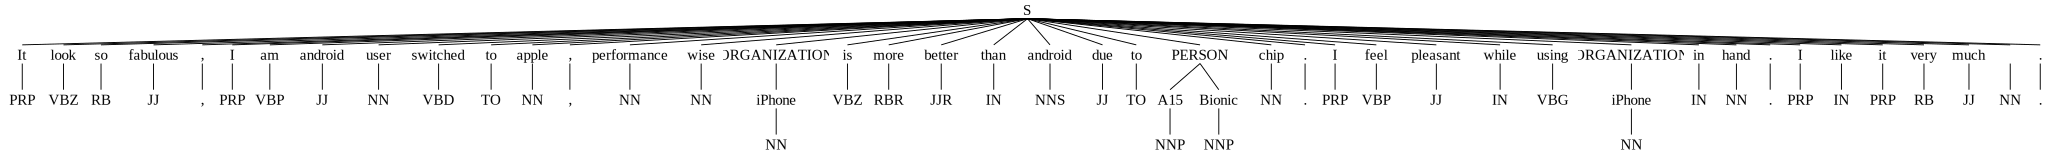

In [17]:
entities = nltk.chunk.ne_chunk(tagged) # analisa os tokens etiquetados (tagged) e identifica entidades nomeadas, como pessoas, organizações, locais, etc.
entities # Exibe a árvore de chunking com as entidades nomeadas identificadas

In [18]:
#  realiza várias configurações e importações úteis para NLP e manipulação de dados
import nltk
nltk.download("stopwords") #As stopwords são palavras comuns (e,de ,o) que geralmente são removidas durante o processamento de texto
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore") #Ignora avisos
pd.set_option("display.max_columns", None) # Mostra todas as colunas
pd.set_option("display.width", 500) # Define a largura máxima da exibição
pd.set_option("display.float_format", lambda x: '%.2f' % x) # Define o formato de exibição para números de ponto flutuante


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
corpus = [] #Inicializa uma lista vazia chamada corpus
from gensim.utils import simple_preprocess # pré-processar texto de forma simples, incluindo a tokenização e a remoção de pontuação e stopwords

In [20]:
reviews = df4['reviewDescription'].tolist()

**DATA ENCODING**


In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

stem = SnowballStemmer('english') # Algoritmo de stemming que reduz palavras às suas raízes.
corpus=[]
for text in reviews:
    text = text.lower() # Converte o texto para minúscula
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>', '', text) # Remove tags HTM
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove pontuação
    text = re.sub(r'\d+', '', text) # Remove números
    tokens = word_tokenize(text) # Tokeniza o texto

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    lemmatized_tokens = [stem.stem(word) for word in filtered_tokens] # Aplica stemming



    cleaned_text = ' '.join(lemmatized_tokens)
    corpus.append(cleaned_text)

In [22]:
# transformar texto em uma matriz de contagem de tokens
from sklearn.feature_extraction.text import CountVectorizer #converte uma coleção de documentos de texto em uma matriz de contagem de tokens
cv = CountVectorizer(max_features = 1000) # limita o número de recursos (tokens) em 1000

**TREINO e TESTE**

In [23]:
from sklearn.model_selection import train_test_split # importar função
from sklearn.ensemble import RandomForestClassifier # algoritmo de ML que combina múltiplas árvores de decisão
from sklearn.metrics import classification_report,accuracy_score, f1_score # métricas de avaliação

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(corpus,df4['Good'],test_size=0.2) # dividir um conjunto de dados em conjuntos de treino (80%) e teste (20%)

In [25]:
X_train_transformed = cv.fit_transform(X_train) # ele aprende o vocabulário dos dados de treino e cria uma matriz
X_test_transformed = cv.transform(X_test) # Transforma os dados de teste usando o vocabulário aprendido dos dados de treino.

In [26]:
# O Random Forest é um algoritmo de ML que combina múltiplas árvores de decisão para melhorar a precisão e controlar o overfitting
rf = RandomForestClassifier() # inicializa um clssificador Random Forest
rf.fit(X_train_transformed,Y_train) # Treina o modelo usando os dados de treino transformados e os rótulos

RandomForestClassifier()

In [27]:
ypred=rf.predict(X_test_transformed) # prever os rótulos dos dados de teste

In [28]:
accuracy = accuracy_score(ypred,Y_test) # Calcula e exibe a acurácia e o F1-score
f1 = f1_score(ypred, Y_test)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Accuracy: 0.8648648648648649
F1-score: 0.9040767386091128


In [30]:
print(classification_report(ypred,Y_test))

              precision    recall  f1-score   support

       False       0.74      0.81      0.77       167
        True       0.92      0.89      0.90       425

    accuracy                           0.86       592
   macro avg       0.83      0.85      0.84       592
weighted avg       0.87      0.86      0.87       592



Histograma da coluna ratingScore do dataframe

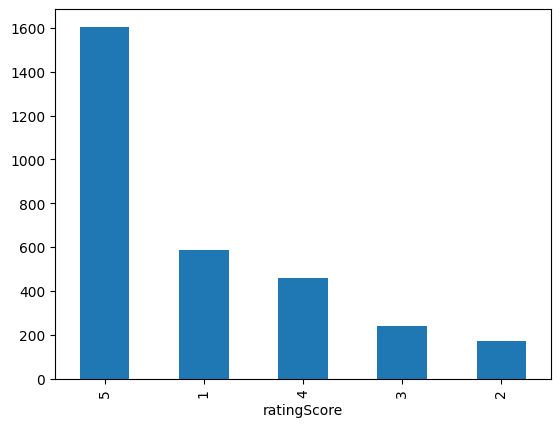

In [31]:
df['ratingScore'].value_counts().plot(kind='bar') #Plota um gráfico de barras
text = ' '.join(df4['reviewDescription'])

In [33]:
!pip install wordcloud
from wordcloud import WordCloud
# nuvens de palavras

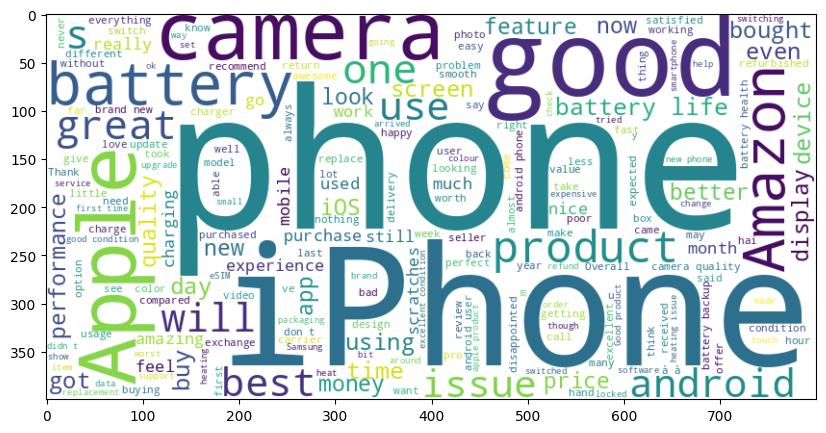

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))  # Cria uma figura com tamanho 10x5
plt.imshow(wordcloud, interpolation='bilinear') # suavizar a imagem

Obter uma visão geral rápida e útil do conjunto de dados, ajudando a identificar a estrutura dos dados e a presença de valores ausentes.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


 Quantidade de dados disponíveis para análise

In [36]:
print(df.shape)

(3062, 11)


Identificar e marcar as partes do discurso de cada palavra em uma descrição de revisão.

In [37]:
example = df['reviewDescription'][5]
print(example)

5 star 👍


In [38]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['5', 'star', '👍']

In [39]:
nltk.download('averaged_perceptron_tagger_eng') # modelo de etiquetagem de partes do discurso (POS tagger)
tagged = nltk.pos_tag(tokens) # aplica a etiquetagem de partes do discurso à lista de tokens (tokens)
tagged[:10] # exibe as primeiras 10 palavras etiquetadas

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('5', 'CD'), ('star', 'NN'), ('👍', 'NN')]

 Identificar e extrair entidades nomeadas do texto, como nomes de pessoas, lugares e organizações

In [40]:
nltk.download('maxent_ne_chunker_tab') # modelo de chunking de entidades nomeadas
nltk.download('words') # Baixa uma lista de palavras comuns em inglês, que é usada pelo modelo de chunking.
entities = nltk.chunk.ne_chunk(tagged) # isso identifica e classifica entidades nomeadas como pessoas, organizações, locais, datas, etc.
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S 5/CD star/NN 👍/NN)


#SVM (Support Vector Machine) + Bag Of Words#

SVM + Bag of Words (BoW) Bag of Words é uma técnica simples que transforma o texto em um vetor de contagem de palavras. Vamos usar o CountVectorizer do scikit-learn para isso.

In [41]:
# SVM com Bag of Words para Previsão e Avaliação

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Criar representação Bag-of-Words
vectorizer = CountVectorizer(max_features=1000)
df['reviewDescription'] = df['reviewDescription'].fillna('')
bag_of_words = vectorizer.fit_transform(df['reviewDescription'])


# Separando variáveis de Treinamento e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df.ratingScore, test_size=0.25, random_state=42) # divide os dados em 75% para treinamento e 25% para teste
print("Tipo de x_treino:", type(x_treino))
print("Tipo de y_treino:", type(y_treino))


svm_bow = LinearSVC(random_state=42) # cria um classificador SVM linear com random_state=42 para garantir resultados reprodutíveis
svm_bow.fit(x_treino, y_treino) #Ajusta o modelo aos dados de treinamento

# Previsões e avaliações
y_pred_bow = svm_bow.predict(x_teste)

# Métricas de avaliação
accuracy_bow = accuracy_score(y_teste, y_pred_bow)
f1_bow = f1_score(y_teste, y_pred_bow, average='weighted') # Use weighted average for multi-class

print(f"Acurácia (SVM + Bag of Words): {accuracy_bow}")
print(f"F1-score (SVM + Bag of Words): {f1_bow}")
print(classification_report(y_teste, y_pred_bow))

Tipo de x_treino: <class 'scipy.sparse._csr.csr_matrix'>
Tipo de y_treino: <class 'pandas.core.series.Series'>
Acurácia (SVM + Bag of Words): 0.6775456919060052
F1-score (SVM + Bag of Words): 0.660829404878488
              precision    recall  f1-score   support

           1       0.62      0.64      0.63       120
           2       0.37      0.28      0.32        47
           3       0.37      0.25      0.30        63
           4       0.45      0.36      0.40       107
           5       0.78      0.87      0.83       429

    accuracy                           0.68       766
   macro avg       0.52      0.48      0.49       766
weighted avg       0.65      0.68      0.66       766



              precision    recall  f1-score   support

           1       0.15      0.02      0.03       120
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00       107
           5       0.56      0.99      0.72       429

    accuracy                           0.55       766
   macro avg       0.14      0.20      0.15       766
weighted avg       0.34      0.55      0.41       766



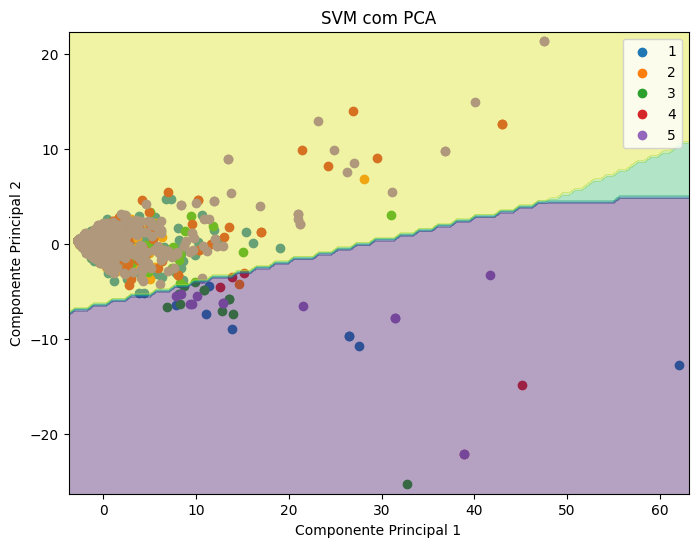

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
x_treino_pca = pca.fit_transform(x_treino.toarray())
x_teste_pca = pca.transform(x_teste.toarray())

# Treinar o modelo SVM com os dados reduzidos
svm_bow_pca = LinearSVC(random_state=42)
svm_bow_pca.fit(x_treino_pca, y_treino)

# Previsões com os dados de teste reduzidos
y_pred_bow_pca = svm_bow_pca.predict(x_teste_pca)

# Avaliar o modelo
accuracy_bow_pca = accuracy_score(y_teste, y_pred_bow_pca)
f1_bow_pca = f1_score(y_teste, y_pred_bow_pca, average='weighted')

#print(f"Acurácia (SVM + Bag of Words + PCA): {accuracy_bow_pca}")
#print(f"F1-score (SVM + Bag of Words + PCA): {f1_bow_pca}")
print(classification_report(y_teste, y_pred_bow_pca))


# Gráfico de dispersão com separador de decisão
plt.figure(figsize=(8, 6))

# Plotar os pontos de treino por classe
for i, label in enumerate(np.unique(y_treino)):
  plt.scatter(x_treino_pca[y_treino == label, 0], x_treino_pca[y_treino == label, 1], label=label)

# Gerar o grid para a linha de decisão
xx, yy = np.meshgrid(np.linspace(x_treino_pca[:, 0].min() - 1, x_treino_pca[:, 0].max() + 1, 100),
                     np.linspace(x_treino_pca[:, 1].min() - 1, x_treino_pca[:, 1].max() + 1, 100))
Z = svm_bow_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a linha de decisão
plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("SVM com PCA")
plt.legend()
plt.show()

#SVM com Embeddings

In [49]:
import spacy
!python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Accuracy (SVM + Embeddings): 0.7956081081081081
F1-score (SVM + Embeddings): 0.8470290771175727
              precision    recall  f1-score   support

       False       0.74      0.65      0.69       209
        True       0.82      0.87      0.85       383

    accuracy                           0.80       592
   macro avg       0.78      0.76      0.77       592
weighted avg       0.79      0.80      0.79       592



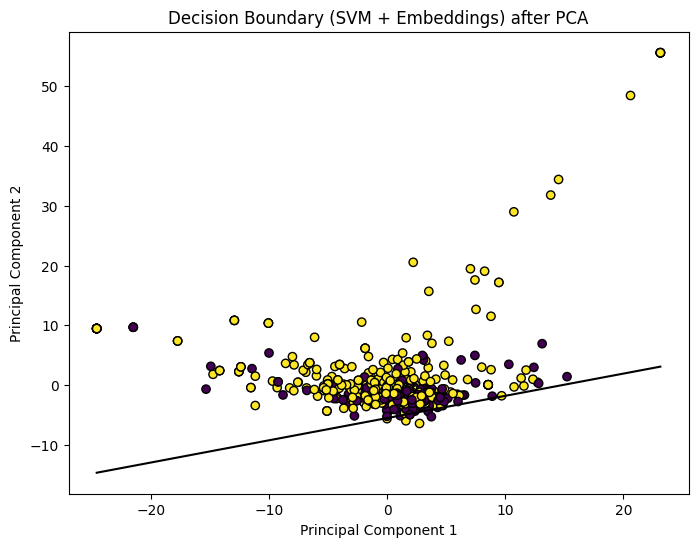

In [48]:
def get_embeddings(text):
    doc = nlp(text)
    return doc.vector  # Retorna o vetor médio de todos os tokens

# 'corpus' é a lista de textos pré-processados
embeddings = [get_embeddings(text) for text in corpus]


# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(embeddings, df4['Good'], test_size=0.2, random_state=42)

# Treinar um modelo LinearSVC
svm_embeddings = LinearSVC(random_state=42)
svm_embeddings.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_embeddings = svm_embeddings.predict(X_test)

# Avaliar o modelo
accuracy_embeddings = accuracy_score(y_test, y_pred_embeddings)
f1_embeddings = f1_score(y_test, y_pred_embeddings)

print(f"Accuracy (SVM + Embeddings): {accuracy_embeddings}")
print(f"F1-score (SVM + Embeddings): {f1_embeddings}")
print(classification_report(y_test, y_pred_embeddings))

from sklearn.preprocessing import StandardScaler
# Aplicar PCA para redução de dimensionalidade (para plotagem)
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(embeddings_pca, df4['Good'], test_size=0.2, random_state=42)

svm_embeddings_pca = LinearSVC(random_state=42)
svm_embeddings_pca.fit(X_train_pca, y_train_pca)


# Crie o gráfico de limite de decisão
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap='viridis', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary (SVM + Embeddings) after PCA")

# Obter o hiperplano de separação
w = svm_embeddings_pca.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X_test_pca[:, 0]), np.max(X_test_pca[:, 0]))
yy = a * xx - (svm_embeddings_pca.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

plt.show()

#BERT#

In [57]:
!pip install transformers
from transformers import BertTokenizer, BertModel
import torch
from sklearn.linear_model import LogisticRegression # Usar regressão logística em vez de Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In [58]:
# Carregar o tokenizer e o modelo BERT pré-treinado
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Função para obter embeddings BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.pooler_output  # Usar pooler_output como embedding
    return embeddings.numpy()

# Obter embeddings para todos os textos
bert_embeddings = [get_bert_embeddings(text) for text in corpus]

# Converter a lista de arrays numpy em um único array numpy
bert_embeddings = np.array(bert_embeddings).squeeze()

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, df4['Good'], test_size=0.2, random_state=42)

# Treinar um modelo de Regressão Logística
bert_classifier = LogisticRegression(max_iter=1000) # Aumentar o número máximo de iterações
bert_classifier.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_bert = bert_classifier.predict(X_test)

# Avaliar o modelo
accuracy_bert = accuracy_score(y_test, y_pred_bert)
f1_bert = f1_score(y_test, y_pred_bert)

print(f"Accuracy (BERT + Logistic Regression): {accuracy_bert}")
print(f"F1-score (BERT + Logistic Regression): {f1_bert}")
print(classification_report(y_test, y_pred_bert))

Accuracy (BERT + Logistic Regression): 0.7516891891891891
F1-score (BERT + Logistic Regression): 0.8239520958083832
              precision    recall  f1-score   support

       False       0.72      0.48      0.58       209
        True       0.76      0.90      0.82       383

    accuracy                           0.75       592
   macro avg       0.74      0.69      0.70       592
weighted avg       0.75      0.75      0.74       592

